<a href="https://colab.research.google.com/github/taimurrabuske/Nuitka/blob/master/flicker_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original signal:
  Avg. amplitude (mean): 0.4999999999999999
  Noise value (std. dev.): 0.009996712422112593
Final values:
  original: 2.4275205509053153e-09


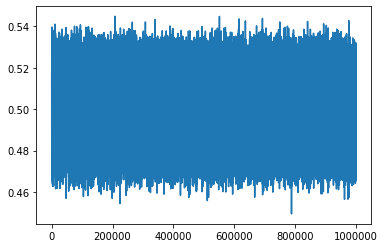

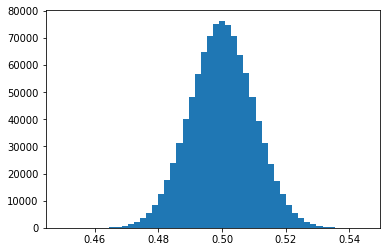

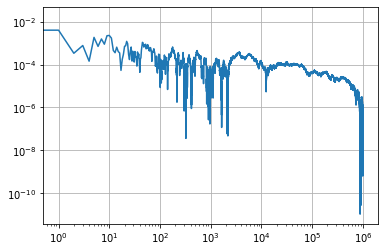

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

sample_size = int(1e6)
resample_period = 50

signal = 0.5
#noise = 0.01*np.random.lognormal(0, 0.7, sample_size)
noise = 0.01*np.random.standard_gamma(1, sample_size)
#noise = np.random.uniform(-0.02, 0.015, sample_size)
#noise = 0.016*np.random.rayleigh(1, sample_size)
#noise = np.random.normal(0,10e-3, sample_size)
bits=12

original_signal = int(2**bits*(signal + noise - noise.mean()))/2**bits
print("Original signal:")
print("  Avg. amplitude (mean):", np.mean(original_signal))
print("  Noise value (std. dev.):", np.std(original_signal))

def ma(Y):
    c = np.cumsum(Y)
    nc = []
    for i, v in enumerate(c):
        nc.append(v/(i+1))
    return np.array(nc)

def resample(y, N):
    j = 1 # index of for loop
    r = 0 # temp variable.
    a = [] # temp array.
    for i in y:
        r += i
        if j == N:
            a.append(r)
            j = 1
            r = 0   
        j += 1

    return np.array(a)/N

plt.figure()
#Time domain plot of a signal with assymmetrical PDF
plt.plot(original_signal)

plt.figure()
#plt.subplot(211)
# and histogram...
plt.hist(original_signal, 50)

#plt.subplot(212)
#resampled_signal = resample(original_signal, resample_period)

#plt.hist(resampled_signal, 50)
plt.figure()
#plt.subplot(211)
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.plot(abs(ma(original_signal)-signal)[0:-10])
#plt.subplot(212)
#plt.plot(ma(resampled_signal))
print("Final values:\n  original:", ma(original_signal-signal)[-2])
#print("\n  resampled:", ma(resampled_signal)[-1])
